In [1]:

from Generator import genPCA
from Generator import genTSNE
from Generator import contributor
from Generator import *
from Preprocess import threshold
from Preprocess import mito_frac

In [2]:
%matplotlib inline

from collections import defaultdict
import scipy
import traceback
import os
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
import sys
import seaborn as sns; sns.set()  # for plot styling


#LOAD DATA
input_path = 'filtered_gene_bc_matrices/zv10_gtf89_cloche_gfp/'

if os.path.isfile(input_path + '/matrix.npz'):
    E = scipy.sparse.load_npz(input_path + '/matrix.npz')
else:
    E = scipy.io.mmread(input_path + '/matrix.mtx').T.tocsc()
    scipy.sparse.save_npz(input_path + '/matrix.npz', E, compressed=True)

print(E.shape)

(1640, 25260)


Threshold min:4000 max:18000
Pre-filter: 1640 barcodes
Post-filter: 1451 barcodes


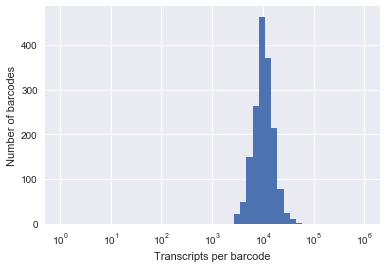

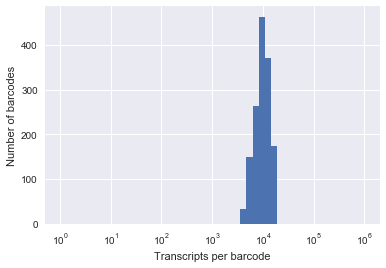

In [3]:
Efilt = threshold(E,4000,18000)[0]


Mito fraction filter: 0.025
Pre-filter: 1451 barcodes
Post-filter: 1401 barcodes


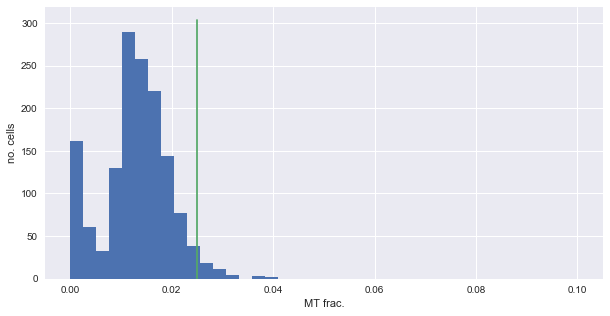

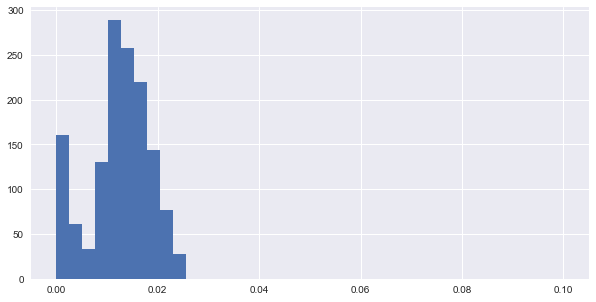

In [4]:
Efilt2 = mito_frac(Efilt,0.025)[0]

C:\Users\Sanjit Dasgupta\Anaconda3.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans5


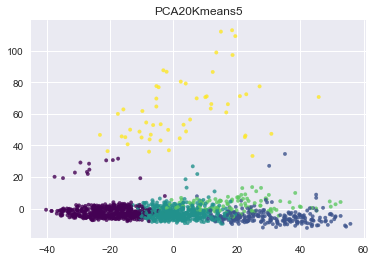

In [5]:
X1 = genPCA(Efilt2,20,5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1401 samples in 0.001s...
[t-SNE] Computed neighbors for 1401 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1401
[t-SNE] Computed conditional probabilities for sample 1401 / 1401
[t-SNE] Mean sigma: 7.256761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.141228
[t-SNE] Error after 300 iterations: 1.062662
PCA(1401, 20)Kmeans5TSNE40


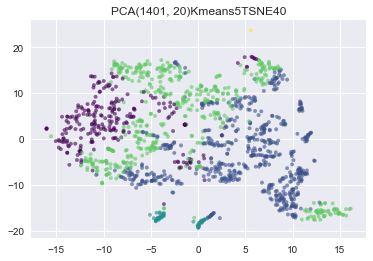

In [6]:
X2 = genTSNE(X1[0],5,40)

PCA 20 PC0 PC1
2.2737367544323206e-13


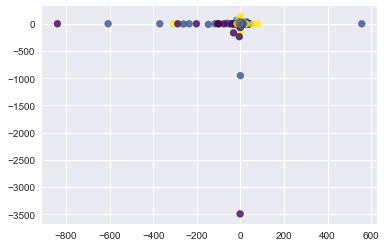

In [7]:
#print(np.mean(X_pca[:, 0]))

#print(X1[0][:, 1].shape)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1[0])
y_kmeans = kmeans.predict(X1[0])
print("PCA 20 PC0 PC1")
print(np.sum(X1[0][:, 1]))
Y1 = np.tan(X1[0][:, 0])
Y2 = np.tan(X1[0][:, 1])
#plt.scatter(X1[0][:, 0], X1[0][:, 1], alpha=0.8,c=y_kmeans, cmap='viridis')
plt.scatter(Y1, Y2, alpha=0.8,c=y_kmeans, cmap='viridis')

In [8]:
contributor(X1[1],0,10)

array([14764,  1954,  5097, 23637, 19623, 14522,  4917, 17529, 20169,
       24346], dtype=int64)

C:\Users\Sanjit Dasgupta\Anaconda3.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


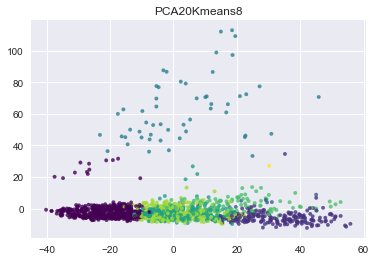

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


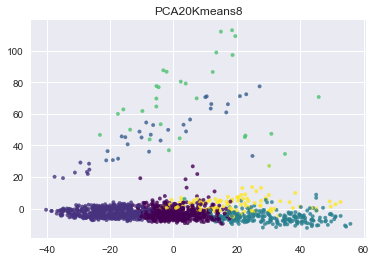

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


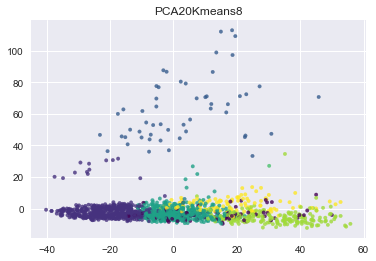

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


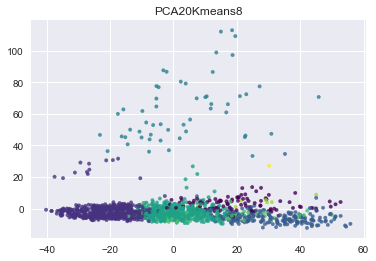

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


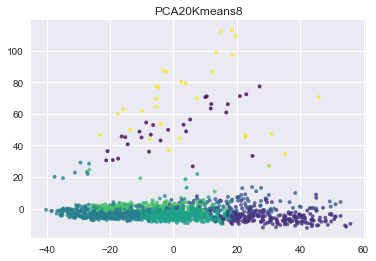

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


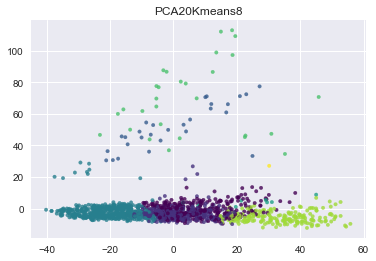

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


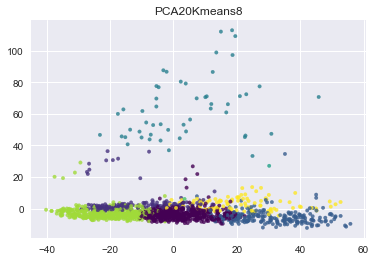

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


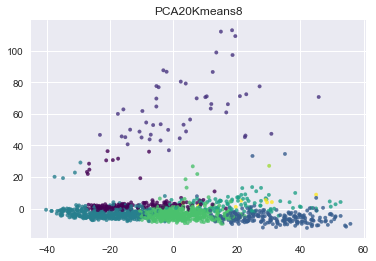

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


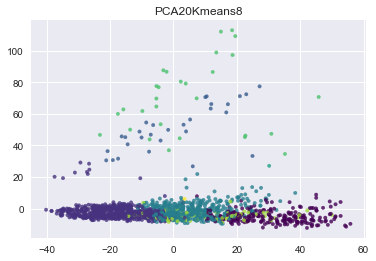

original shape:    (1401, 25260)
transformed shape: (1401, 20)
PCA20Kmeans8


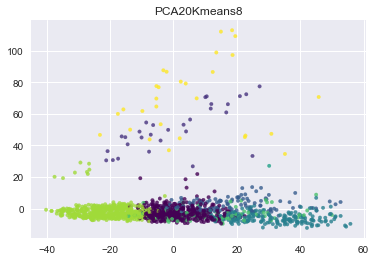

In [9]:
l = []
for i in range(10):
    l.append(genPCA(Efilt2,20,8))

In [10]:
for i in range(10):
    print(contributor(l[i][1],1,10))

[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
[23958 16721  5772 16724 16728 23005 22962 16727 16722 16731]
